In [2]:
import tracking_kline as tk

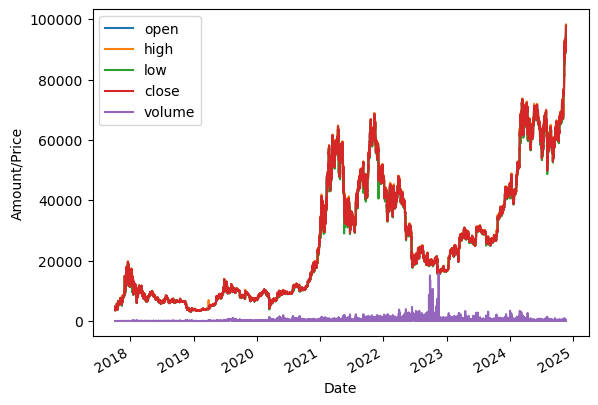

In [3]:
#Getting and plotting of kline
kline = tk.kuc_collect_multi_kline("BTC-USDT", "hour", 1, 100)
kline = tk.change_to_datetime(kline)
kline.head()
kline[['open', 'high', 'low', 'close', 'volume']].plot(xlabel="Date", ylabel="Amount/Price")
highs_and_lows = kline[["high", "low", "volume"]]

In [4]:
#What does the high and low of the kline look like
highs_and_lows

,high,low,volume
time,,,
2017-10-04 00:00:00,4307.0,4307.0,0.001000
2017-10-04 05:00:00,4307.0,4307.0,0.028360
2017-10-05 09:00:00,3500.0,3500.0,0.010368
2017-10-05 20:00:00,4860.0,4860.0,0.015000
2017-10-06 22:00:00,3850.0,3850.0,0.003568
...,...,...,...
2024-11-21 03:00:00,97148.8,96751.0,149.779515
2024-11-21 04:00:00,97700.0,97027.8,147.584026
2024-11-21 05:00:00,97750.0,97258.0,171.020606


In [5]:
#What does the kline look like
kline

,open,close,high,low,volume,turnover
time,,,,,,
2017-10-04 00:00:00,4307.0,4307.0,4307.0,4307.0,0.001000,4.307000e+00
2017-10-04 05:00:00,4307.0,4307.0,4307.0,4307.0,0.028360,1.221450e+02
2017-10-05 09:00:00,3500.0,3500.0,3500.0,3500.0,0.010368,3.628769e+01
2017-10-05 20:00:00,4860.0,4860.0,4860.0,4860.0,0.015000,7.290000e+01
2017-10-06 22:00:00,3850.0,3850.0,3850.0,3850.0,0.003568,1.373645e+01
...,...,...,...,...,...,...
2024-11-21 03:00:00,96924.3,97122.9,97148.8,96751.0,149.779515,1.452047e+07
2024-11-21 04:00:00,97119.3,97611.2,97700.0,97027.8,147.584026,1.438268e+07
2024-11-21 05:00:00,97611.1,97735.6,97750.0,97258.0,171.020606,1.668341e+07


<Axes: xlabel='time'>

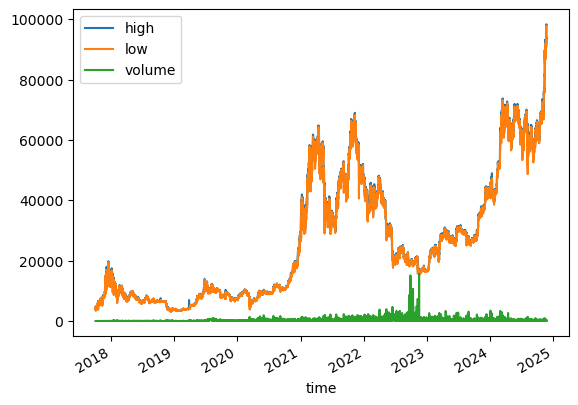

In [6]:
#Plot of highs and lows
highs_and_lows.plot()


In [7]:
#Get the percent changes of the highs, lows, and volume
highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)
highs_and_lows["Volume Percent Change"] = highs_and_lows["volume"].pct_change(24)

C:\Users\Eza\AppData\Local\Temp\ipykernel_9972\3877412192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
C:\Users\Eza\AppData\Local\Temp\ipykernel_9972\3877412192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)


In [8]:
#Correlation of highs and lows
highs_and_lows.corr()["Volume Percent Change"]

high                    -0.000425
low                     -0.000510
volume                   0.009312
High Percent Change      0.001687
Low Percent Change      -0.001211
Volume Percent Change    1.000000
Name: Volume Percent Change, dtype: float64

          mean    median
time                    
1     1.515752 -0.017349
2          inf -0.033062
3     0.492466 -0.018347
4          inf -0.004612
5     0.380463 -0.002769
6     0.603967 -0.017616
7          inf  0.007762
8          inf -0.026553
9          inf -0.014086
10    1.336196 -0.019348
11    4.711563 -0.006188
12         inf -0.024899


<Axes: xlabel='time'>

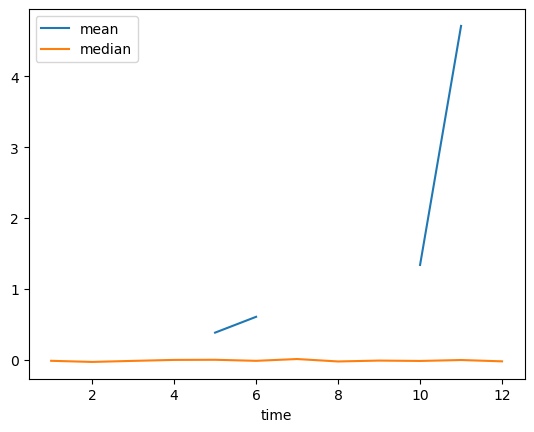

In [9]:
#See if there are any monthly volume swings, what the median looks like 
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.002054  0.002657
2     0.005122  0.002262
3     0.001689  0.002692
4     0.002942  0.002382
5    -0.000344  0.001746
6    -0.001273  0.000488
7     0.003648  0.001956
8    -0.001069  0.000062
9    -0.001194  0.001050
10    0.006785  0.001928
11    0.001857  0.002273
12    0.003332  0.000769


<Axes: xlabel='time'>

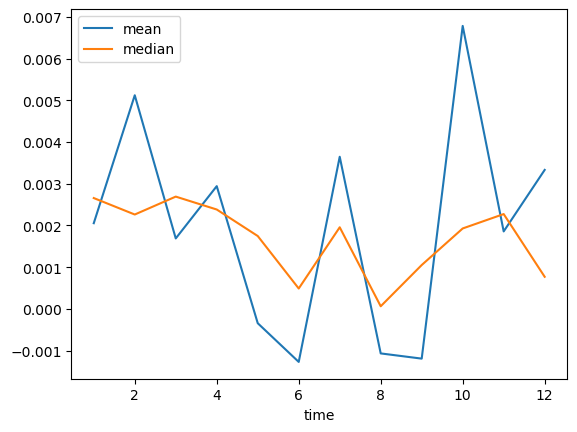

In [10]:
#Same here but for lows
bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.001710  0.001262
2     0.005081  0.001162
3     0.001406  0.001292
4     0.002977  0.001095
5    -0.000527  0.000441
6    -0.001249 -0.000906
7     0.003557  0.001258
8    -0.001167 -0.000724
9    -0.001210 -0.000005
10    0.006691  0.000985
11    0.002043  0.000921
12    0.003227 -0.000219


<Axes: xlabel='time'>

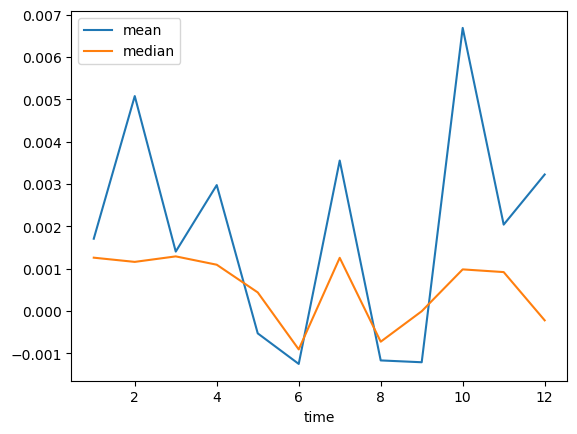

In [11]:
#Same here but for highs
bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()


           mean    median
time                     
2017  21.086768  0.056509
2018   1.378460 -0.014241
2019        inf  0.003887
2020   0.494048 -0.012147
2021        inf -0.013819
2022        inf -0.032509
2023        inf -0.024309
2024   0.559760 -0.020866


<Axes: xlabel='time'>

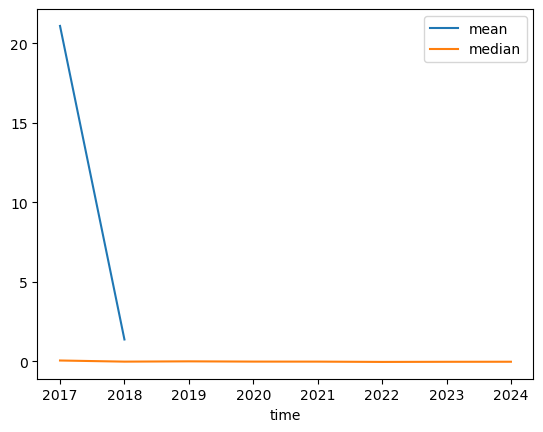

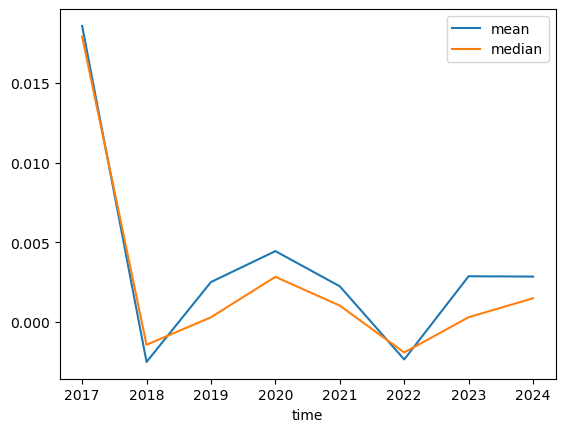

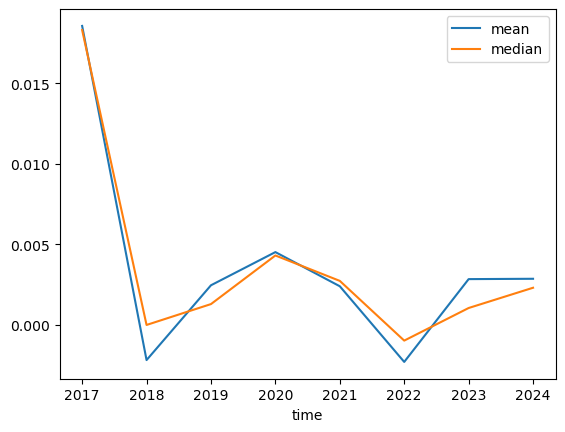

In [12]:
#The above is repeated for the yearly cycle
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
bitcoin_data.plot()

                mean    median
time time                     
2017 10    13.535442  0.212946
     11    34.095517 -0.027404
     12    11.970724  0.036807
2018 1      6.922983  0.005598
     2      0.380810 -0.037298
...              ...       ...
2024 7      0.450976  0.046899
     8      0.544766 -0.058982
     9      0.580930  0.015228
     10     0.566987 -0.039727
     11     0.603853 -0.000989

[86 rows x 2 columns]


<Axes: xlabel='time,time'>

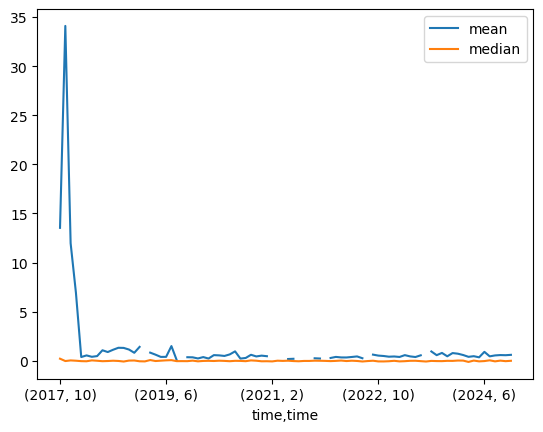

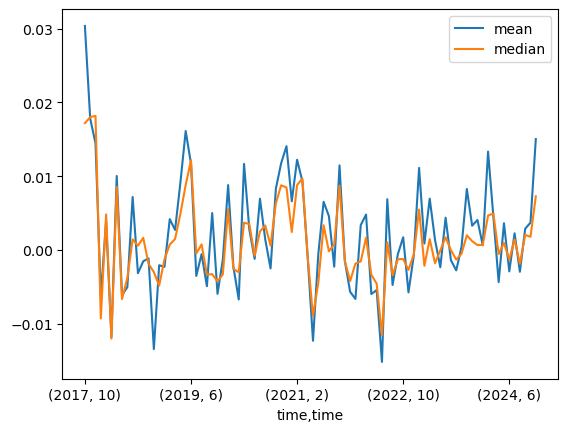

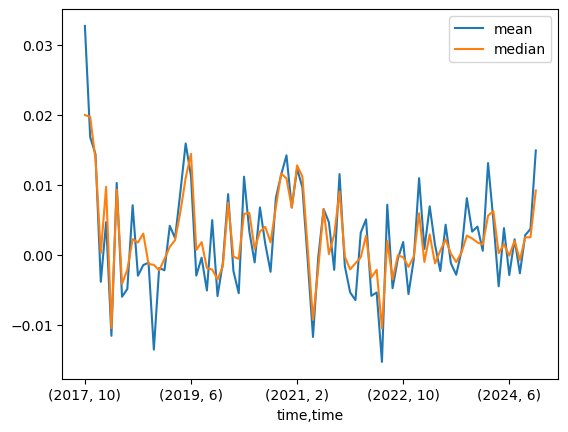

In [13]:
#The above is repeated for the yearly cycle and monthly cycle
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
bitcoin_data.plot()

          mean    median
time                    
0          inf  0.330659
1          inf -0.009892
2          inf  0.024901
3          inf -0.034979
4          inf -0.095533
5     0.498911 -0.289621
6          inf  0.097327


<Axes: xlabel='time'>

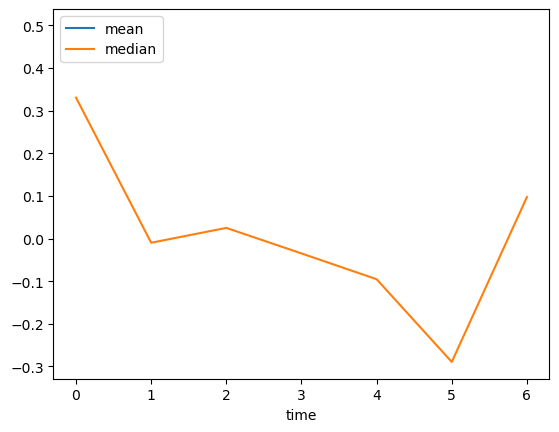

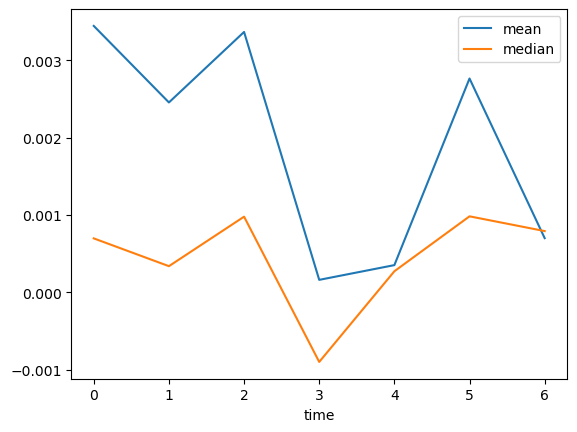

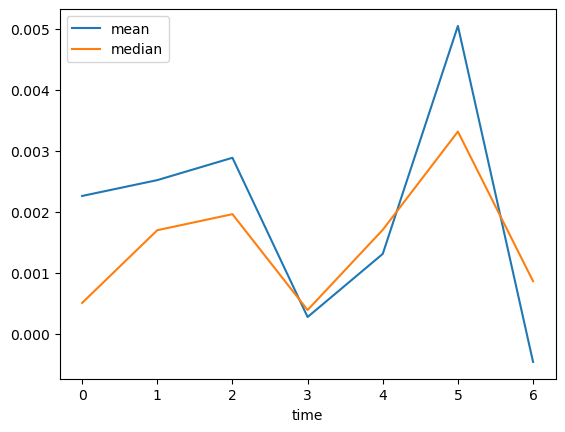

In [14]:
#The above is repeated for the day of week cycle
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.day_of_week]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.day_of_week]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.day_of_week]).agg(["mean", "median"])
bitcoin_data.plot()

          mean    median
time                    
0          inf -0.007234
1          inf -0.016835
2          inf -0.007865
3          inf -0.002888
4          inf -0.014086
5          inf -0.031440
6          inf -0.004597
7          inf -0.013869
8          inf  0.012332
9          inf  0.005974
10         inf  0.000006
11         inf -0.006131
12    2.343347  0.010295
13    1.973944 -0.019607
14    0.614185  0.000272
15    0.677687 -0.001734
16    0.586224 -0.015764
17    0.523698 -0.032502
18    0.614102 -0.026464
19         inf -0.033621
20         inf -0.024923
21         inf -0.028907
22         inf -0.034991
23         inf -0.018306


<Axes: xlabel='time'>

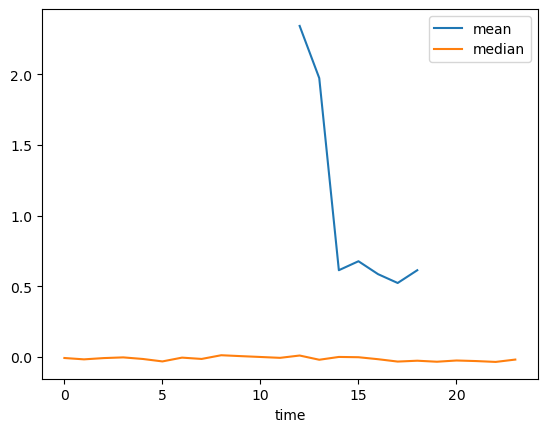

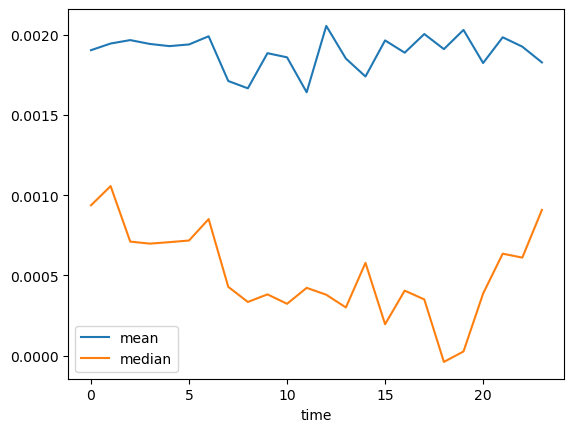

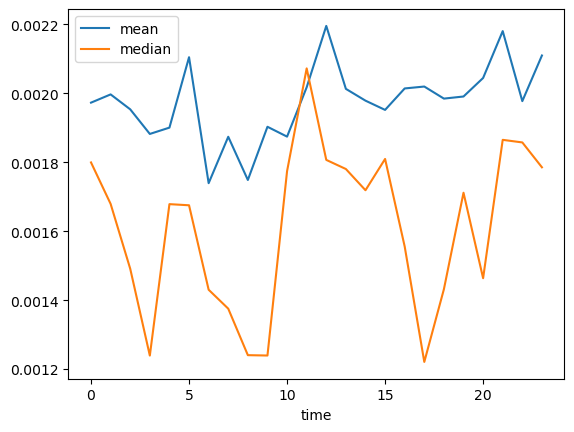

In [15]:
#The above is repeated for the hourly cycle
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.hour]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.hour]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.hour]).agg(["mean", "median"])
bitcoin_data.plot()

In [16]:
#Correlation is done so that a seaborn heatmap plot can be made
correlation = kline[["high", "low", "volume"]].corr()
correlation

,high,low,volume
high,1.000000,0.999904,0.149012
low,0.999904,1.000000,0.144687
volume,0.149012,0.144687,1.000000


<Axes: >

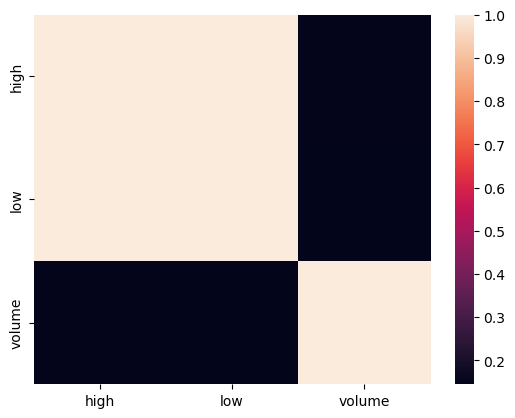

In [17]:
import seaborn as sns
sns.heatmap(correlation)


<Axes: xlabel='time,time'>

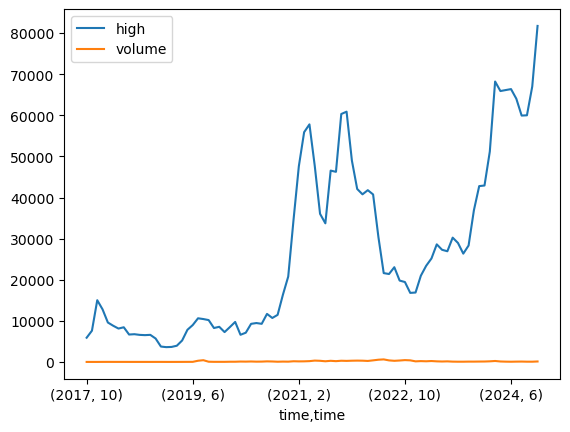

In [18]:
#Check for yearly and monthly volume and high changes
kline[["high", "volume"]].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

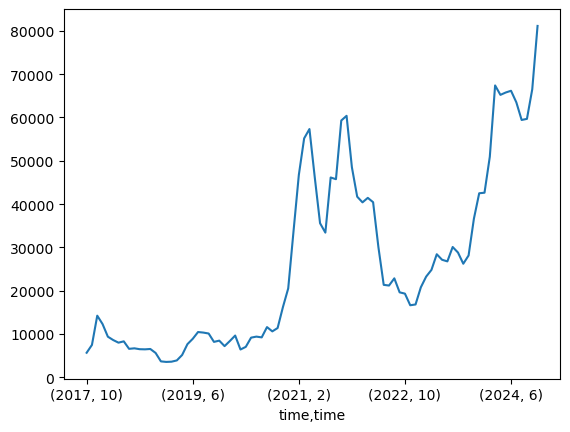

In [19]:
#Check for yearly and monthly low changes for median
kline["low"].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

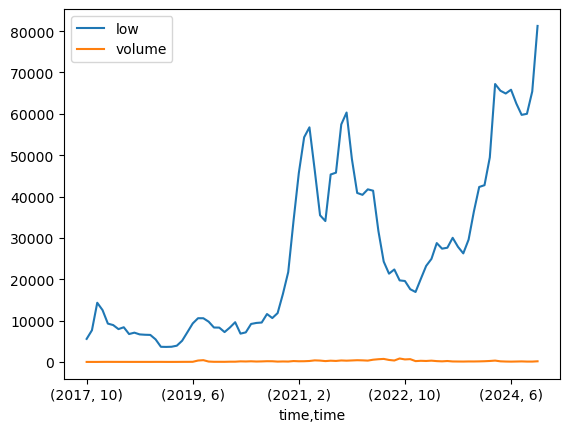

In [20]:
#Check for yearly and monthly low changes for mean
kline[["low", "volume"]].groupby(by=[kline.index.year, kline.index.month]).mean().plot()